# Reto-> Entrega 1 (16/11) -> Limpieza, análisis, visualización y kmeans

**Nombre 1:** Daniela Estevez Rodriguez

**Matricula 1:** A01793723
<br>
<br>

**Nombre 2:** Ernesto Nicanor Santillán Guerrero 

**Matricula 2:** A01793675



**Materia:** Ciencia y analítica de datos

**Profesor:** María de la Paz Rico Fernández

**Fecha:** 16 de Noviembre de 2022

In [1]:
# Librerías

# Para omitir los mensajes de warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
import fiona

import geopandas as gpd
from shapely.geometry import Point

from sklearn.cluster import KMeans

pd.options.display.max_columns=60
pd.options.display.max_rows=70

In [2]:
# Directorio local
path="/Users/danielaestevezrodriguez/Documents/Educación continua y posgrados/Tec de Monterrey/2do Trimestre/Ciencia y analítica de datos/Actividades grupales/Reto _1/Datos_de_calidad_del_agua_2020/"
#path="/Users/santien/reto_1/"
os.listdir(path)

['Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv',
 'Escalas_superficial.csv',
 '.DS_Store',
 'Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv',
 'Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.kmz',
 'doc_subterraneas.kml',
 'doc_superficiales.kml',
 'Escalas_subterranea.csv',
 'Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.kmz']

In [3]:
# Documentos
file1 = 'doc_subterraneas.kml'
file2 = 'doc_superficiales.kml'
file3 = 'Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'
file4 = 'Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv'
file5 = 'Escalas_subterranea.csv'
file6 = 'Escalas_superficial.csv'

In [4]:
# Descarga kml subterraneas
if os.path.exists(path+file1):
    fiona.drvsupport.supported_drivers['KML'] = 'rw'
    df_subterraneas = gpd.read_file(path+file1, driver='KML')
    
# Algunos rows de subterraneas
df_subterraneas.head()

,Name,Description,geometry
0,,,POINT Z (-102.02210 22.20887 0.00000)
1,,,POINT Z (-102.20075 21.99958 0.00000)
2,,,POINT Z (-102.28801 22.36685 0.00000)
3,,,POINT Z (-102.29449 22.18435 0.00000)
4,,,POINT Z (-110.24480 23.45138 0.00000)


In [5]:
# Descarga kml superficiales
if os.path.exists(path+file2):
    fiona.drvsupport.supported_drivers['KML'] = 'rw'
    df_superficiales = gpd.read_file(path+file2, driver='KML')
    
# Algunos rows de superficiales
df_superficiales.head()

,Name,Description,geometry
0,,,POINT Z (-102.33911 22.24730 0.00000)
1,,,POINT Z (-109.84290 22.90473 0.00000)
2,,,POINT Z (-109.86442 22.89880 0.00000)
3,,,POINT Z (-109.88604 22.89609 0.00000)
4,,,POINT Z (-109.89657 22.87694 0.00000)


In [6]:
# Descarga csv calidad subterraneas
if os.path.exists(path+file3):
    df_calidad_agua_sub=pd.read_csv(path+file3,encoding='latin1')

# Algunos rows de subterraneas
df_calidad_agua_sub.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,NaN,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,NaN,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,NaN,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,NaN,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,Potable - Dura,<1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,<0.003,Potable - Excelente,0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,NaN,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [7]:
# Descarga csv calidad superficiales
if os.path.exists(path+file4):
    df_calidad_agua_sup=pd.read_csv(path+file4,encoding='latin1')

# Algunos rows de superficiales
df_calidad_agua_sup.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,LATITUD,PERIODO,DBO_mg/L,CALIDAD_DBO,DQO_mg/L,CALIDAD_DQO,SST_mg/L,CALIDAD_SST,COLI_FEC_NMP_100mL,CALIDAD_COLI_FEC,E_COLI_NMP_100mL,CALIDAD_E_COLI,ENTEROC_NMP_100mL,CALIDAD_ENTEROC,OD_PORC,CALIDAD_OD_PORC,OD_PORC_SUP,CALIDAD_OD_PORC_SUP,OD_PORC_MED,CALIDAD_OD_PORC_MED,OD_PORC_FON,CALIDAD_OD_PORC_FON,TOX_D_48_UT,CALIDAD_TOX_D_48,TOX_V_15_UT,CALIDAD_TOX_V_15,TOX_D_48_SUP_UT,CALIDAD TOX_D_48_SUP,TOX_D_48_FON_UT,CALIDAD_TOX_D_48_FON,TOX_FIS_SUP_15_UT,CALIDAD_TOX_FIS_SUP_15,TOX_FIS_FON_15_UT,CALIDAD_TOX_FIS_FON_15,SEMAFORO,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,22.24730,2020.0,6,Buena calidad,54.08,Contaminada,13.75,Excelente,1162,Contaminada,98,Excelente,NaN,NaN,NaN,NaN,46.8,Aceptable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,<1,No Toxico,NaN,NaN,Rojo,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,22.90473,2020.0,NaN,NaN,NaN,NaN,<10,Excelente,NaN,NaN,NaN,NaN,20,Excelente,NaN,NaN,92,Excelente,95.4,Excelente,92.2,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,22.89880,2020.0,NaN,NaN,NaN,NaN,<10,Excelente,NaN,NaN,NaN,NaN,<3,Excelente,NaN,NaN,92,Excelente,95.4,Excelente,92.2,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,22.89609,2020.0,NaN,NaN,NaN,NaN,13.9667,Excelente,NaN,NaN,NaN,NaN,<3,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,86.7,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,22.87694,2020.0,NaN,NaN,NaN,NaN,<10,Excelente,NaN,NaN,NaN,NaN,30,Excelente,NaN,NaN,96.2,Excelente,95.9,Excelente,95.5,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO


In [8]:
# Descarga csv escalas subterraneas
if os.path.exists(path+file5):
    df_escala_sub=pd.read_csv(path+file5,encoding='latin1')

# Algunos rows de subterraneas
df_escala_sub.head()

,CALIDAD DEL AGUA PARA COLIFORMES FECALES_subterraneas,CRITERIO,DESCRIPCION
0,Excelente,COLI_FEC menor a 1.1,Agua potable. Agua no contaminada o condicion ...
1,Buena calidad,COLI_FEC mayor o igual de 1.1 y menor o igual ...,Aguas para uso recreativo con contacto primari...
2,Aceptable,COLI_FEC mayor de 200 y menor o igual a 1000,Aguas con calidad admisible como fuente de aba...
3,Contaminada,COLI_FEC mayor de 1000 y menor o igual a 10000,Aguas con contaminacion bacteriologica. Indic...
4,Fuertemente contaminada,COLI_FEC mayor de 10000,Aguas con fuerte contaminacion bacteriologica....


In [9]:
# Descarga csv escalas superficiales
if os.path.exists(path+file6):
    df_escala_sup=pd.read_csv(path+file6,encoding='latin1')
    
# Algunos rows de superficiales
df_escala_sup.head()

,CALIDAD DEL AGUA PARA TOXICIDAD,CRITERIO,DESCRIPCION
0,No t¢xico,TOX menor a 1,Agua no contaminada.Toxicidad no detectable.
1,Toxicidad baja,TOX mayor o igual a 1 y menor o igual a 1.33,Toxicidad baja
2,Toxicidad moderada,TOX mayor de 1.33 y menor a 5,Toxicidad moderada
3,Toxicidad alta,TOX mayor o igual a 5,Toxicidad alta
4,CALIDAD DEL AGUA PARA SST,CRITERIO,DESCRIPCION


**Mapa utilizando ambas fuentes de datos**

In [10]:
#mapa mundial
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,889953.0,Oceania,Fiji,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,58005463.0,Africa,Tanzania,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253.0,Africa,W. Sahara,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,37589262.0,North America,Canada,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,328239523.0,North America,United States of America,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


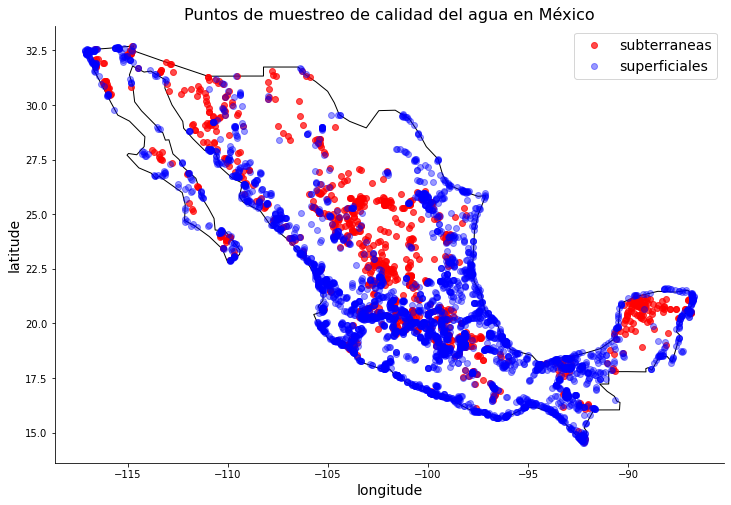

In [11]:
fig, gax = plt.subplots(figsize=(12,12))
# Seleccionar solo México
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

# Locaciones geograficas de interes
df_subterraneas.plot(ax=gax, color='red', alpha = 0.7,legend = True)
df_superficiales.plot(ax=gax, color='blue', alpha = 0.4,legend = True)
#centers_df.plot(ax=gax,color='green')

gax.set_xlabel('longitude',fontsize=14)
gax.set_ylabel('latitude',fontsize=14)
gax.set_title('Puntos de muestreo de calidad del agua en México',fontsize=16)
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
gax.legend(['subterraneas','superficiales'],fontsize=14)
plt.show()

**Elegimos utilizar los datos de calidad de agua de fuentes subterraneas. A continuación mapa solo con fuentes subterraneas**

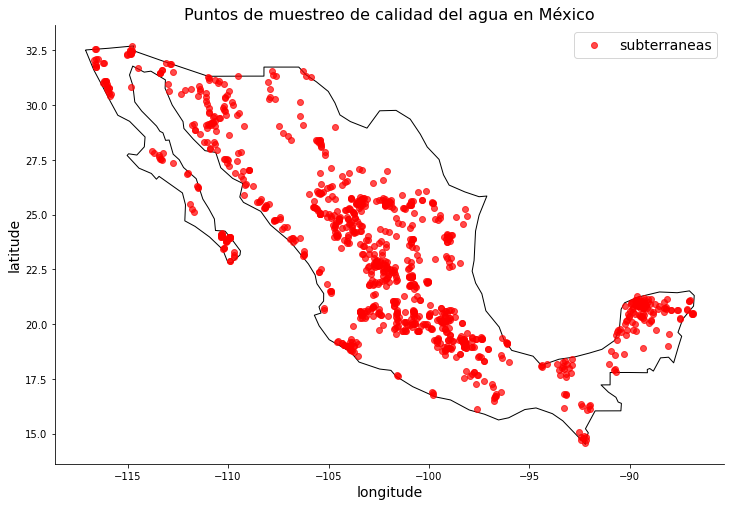

In [12]:
fig, gax = plt.subplots(figsize=(12,12))
# Seleccionar solo México
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

# Locaciones geograficas de interes
df_subterraneas.plot(ax=gax, color='red', alpha = 0.7,legend = True)
#centers_df.plot(ax=gax,color='green')

gax.set_xlabel('longitude',fontsize=14)
gax.set_ylabel('latitude',fontsize=14)
gax.set_title('Puntos de muestreo de calidad del agua en México',fontsize=16)
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
gax.legend(['subterraneas'],fontsize=14)
plt.show()

## 1. Limpieza de base de datos.

### Exploración de los datos para limpieza

In [13]:
df_calidad_agua_sub.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,NaN,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,NaN,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,NaN,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,NaN,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,Potable - Dura,<1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,<0.003,Potable - Excelente,0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,NaN,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [14]:
df_calidad_agua_sub.dtypes

CLAVE                    object
SITIO                    object
ORGANISMO_DE_CUENCA      object
ESTADO                   object
MUNICIPIO                object
ACUIFERO                 object
SUBTIPO                  object
LONGITUD                float64
LATITUD                 float64
PERIODO                   int64
ALC_mg/L                float64
CALIDAD_ALC              object
CONDUCT_mS/cm           float64
CALIDAD_CONDUC           object
SDT_mg/L                float64
SDT_M_mg/L               object
CALIDAD_SDT_ra           object
CALIDAD_SDT_salin        object
FLUORUROS_mg/L           object
CALIDAD_FLUO             object
DUR_mg/L                 object
CALIDAD_DUR              object
COLI_FEC_NMP/100_mL      object
CALIDAD_COLI_FEC         object
N_NO3_mg/L               object
CALIDAD_N_NO3            object
AS_TOT_mg/L              object
CALIDAD_AS               object
CD_TOT_mg/L              object
CALIDAD_CD               object
CR_TOT_mg/L              object
CALIDAD_

**Obs:**
    
-  La mayoría de las variables son del tipo objeto.

In [15]:
df_calidad_agua_sub.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CLAVE,1068,1068,DLAGU6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SITIO,1068,1066,EL FUERTE,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ORGANISMO_DE_CUENCA,1068,13,CUENCAS CENTRALES DEL NORTE,232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESTADO,1068,32,DURANGO,121,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MUNICIPIO,1068,452,LA PAZ,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACUIFERO,1068,273,PENINSULA DE YUCATAN,119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SUBTIPO,1068,8,POZO,1039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LONGITUD,1068.0,NaN,NaN,NaN,-101.891007,6.703263,-116.66425,-105.388865,-102.17418,-98.974716,-86.86412
LATITUD,1068.0,NaN,NaN,NaN,23.163618,3.88767,14.56115,20.212055,22.61719,25.510285,32.677713
PERIODO,1068.0,NaN,NaN,NaN,2020.0,0.0,2020.0,2020.0,2020.0,2020.0,2020.0


**Obs:**

- Las pocas variables numéricas tienen rangos muy diferente.
- Notamos algunas variables de objeto deben convertirse a númericas, algunas a categóricas o binarias y algunas a ordinarias.

In [16]:
df_calidad_agua_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

**Obs:**

-> SDT_mg/L no tiene ningun registro por lo que se va a eliminar.

In [17]:
# eliminar columna con puros nulls
df_calidad_agua_sub.drop('SDT_mg/L',axis=1,inplace=True)

### Muchas columnas tipo objeto, pero con datos númericos

In [18]:
[(item,df_calidad_agua_sub[item].dtype, df_calidad_agua_sub[item].isna().sum(),list(df_calidad_agua_sub[item].head(2))) \
 for item in df_calidad_agua_sub.columns]

[('CLAVE', dtype('O'), 0, ['DLAGU6', 'DLAGU6516']),
 ('SITIO', dtype('O'), 0, ['POZO SAN GIL', 'POZO R013 CAÑADA HONDA']),
 ('ORGANISMO_DE_CUENCA',
  dtype('O'),
  0,
  ['LERMA SANTIAGO PACIFICO', 'LERMA SANTIAGO PACIFICO']),
 ('ESTADO', dtype('O'), 0, ['AGUASCALIENTES', 'AGUASCALIENTES']),
 ('MUNICIPIO', dtype('O'), 0, ['ASIENTOS', 'AGUASCALIENTES']),
 ('ACUIFERO', dtype('O'), 0, ['VALLE DE CHICALOTE', 'VALLE DE CHICALOTE']),
 ('SUBTIPO', dtype('O'), 0, ['POZO', 'POZO']),
 ('LONGITUD', dtype('float64'), 0, [-102.0221, -102.20075]),
 ('LATITUD', dtype('float64'), 0, [22.20887, 21.99958]),
 ('PERIODO', dtype('int64'), 0, [2020, 2020]),
 ('ALC_mg/L', dtype('float64'), 4, [229.99, 231.99]),
 ('CALIDAD_ALC', dtype('O'), 4, ['Alta', 'Alta']),
 ('CONDUCT_mS/cm', dtype('float64'), 6, [940.0, 608.0]),
 ('CALIDAD_CONDUC',
  dtype('O'),
  6,
  ['Permisible para riego', 'Buena para riego']),
 ('SDT_M_mg/L', dtype('O'), 2, ['603.6', '445.4']),
 ('CALIDAD_SDT_ra',
  dtype('O'),
  2,
  ['Cultivos se

In [19]:
df_calidad_agua_sub.loc[:,'SDT_M_mg/L':'FE_TOT_mg/L'].head(3)

,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L
0,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891
1,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025
2,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025


In [20]:
def convert_to_numeric(item):
    if type(item)==str:
        item=item.strip('<')
    return float(item)    

In [21]:
col_a_numeric=[item for item in df_calidad_agua_sub.loc[:,'SDT_M_mg/L':'FE_TOT_mg/L'].columns if "CALIDAD" not in item]

In [22]:
for col in col_a_numeric:
    df_calidad_agua_sub[col]=df_calidad_agua_sub[col].apply(convert_to_numeric)

### Mostrar solo los que tienen datos faltantes

In [23]:
# Mostrar solo los que tienen datos faltantes
missing_data=[(item,df_calidad_agua_sub[item].dtype, df_calidad_agua_sub[item].isna().sum(),list(df_calidad_agua_sub[item].head(2))) \
 for item in df_calidad_agua_sub.columns if df_calidad_agua_sub[item].isna().sum() > 0]
missing_data

[('ALC_mg/L', dtype('float64'), 4, [229.99, 231.99]),
 ('CALIDAD_ALC', dtype('O'), 4, ['Alta', 'Alta']),
 ('CONDUCT_mS/cm', dtype('float64'), 6, [940.0, 608.0]),
 ('CALIDAD_CONDUC',
  dtype('O'),
  6,
  ['Permisible para riego', 'Buena para riego']),
 ('SDT_M_mg/L', dtype('float64'), 2, [603.6, 445.4]),
 ('CALIDAD_SDT_ra',
  dtype('O'),
  2,
  ['Cultivos sensibles', 'Excelente para riego']),
 ('CALIDAD_SDT_salin', dtype('O'), 2, ['Potable - Dulce', 'Potable - Dulce']),
 ('DUR_mg/L', dtype('float64'), 1, [213.732, 185.0514]),
 ('CALIDAD_DUR', dtype('O'), 1, ['Potable - Dura', 'Potable - Dura']),
 ('N_NO3_mg/L', dtype('float64'), 1, [4.184656, 5.75011]),
 ('CALIDAD_N_NO3',
  dtype('O'),
  1,
  ['Potable - Excelente', 'Potable - Buena calidad']),
 ('CONTAMINANTES', dtype('O'), 434, [nan, nan])]

In [24]:
for item in missing_data:
    if item[1]==float:
        df_calidad_agua_sub[item[0]].fillna(df_calidad_agua_sub[item[0]].median(),inplace=True)
    elif item[0] == 'CONTAMINANTES':
        df_calidad_agua_sub['CONTAMINANTES'].fillna('Ninguno',inplace=True)
    else:    
        df_calidad_agua_sub[item[0]].fillna(df_calidad_agua_sub[item[0]].mode()[0],inplace=True)      


In [25]:
df_calidad_agua_sub.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.7320,Potable - Dura,1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,Ninguno,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,1.1,Potable - Excelente,5.750110,Potable - Buena calidad,0.0134,Apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0250,Potable - Excelente,Verde,Ninguno,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,342.0,Excelente para riego,Potable - Dulce,1.8045,Alta,120.7190,Potable - Dura,1.1,Potable - Excelente,1.449803,Potable - Excelente,0.0370,No apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0250,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.8790,Potable - Dura,1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0250,Potable - Excelente,Verde,Ninguno,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,1179.0,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291.0,Aceptable,15.672251,No apta como FAAP,0.0100,Potable - Excelente,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0250,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


### Definir diccionarios para  mapeo ordinal

In [26]:
[(item,df_calidad_agua_sub[item].value_counts(),len(df_calidad_agua_sub[item].value_counts())) for item in df_calidad_agua_sub.columns if "CALIDAD" in item]

[('CALIDAD_ALC',
  Alta                    798
  Media                   187
  Indeseable como FAAP     59
  Baja                     24
  Name: CALIDAD_ALC, dtype: int64,
  4),
 ('CALIDAD_CONDUC',
  Permisible para riego    466
  Buena para riego         434
  Dudosa para riego         72
  Indeseable para riego     51
  Excelente para riego      45
  Name: CALIDAD_CONDUC, dtype: int64,
  5),
 ('CALIDAD_SDT_ra',
  Excelente para riego            493
  Cultivos sensibles              343
  Cultivos con manejo especial    161
  Cultivos tolerantes              64
  Indeseable para riego             7
  Name: CALIDAD_SDT_ra, dtype: int64,
  5),
 ('CALIDAD_SDT_salin',
  Potable - Dulce         836
  Ligeramente salobres    161
  Salobres                 68
  Salinas                   3
  Name: CALIDAD_SDT_salin, dtype: int64,
  4),
 ('CALIDAD_FLUO',
  Baja                434
  Potable - Optima    226
  Media               216
  Alta                192
  Name: CALIDAD_FLUO, dtype: int64,
 

In [27]:
dic_ords={item:{} for item in df_calidad_agua_sub.columns if item.startswith(('CALIDAD','CUMPLE','SEMAFORO'))}

In [28]:
dic_ords['CALIDAD_ALC']={'Indeseable como FAAP':0,'Indeseable':1,'Baja':2,'Media':3,'Alta':4}

In [29]:
dic_ords['CALIDAD_CONDUC']={'Indeseable para riego':0,'Dudosa para riego':1,'Permisible para riego':2,'Buena para riego':3,\
                                                                                'Excelente para riego':4}

In [30]:
dic_ords['CALIDAD_SDT_ra']={'Indeseable para riego':0,'Cultivos tolerantes':1,'Cultivos con manejo especial':2,'Cultivos sensibles':3,\
                                                                                'Excelente para riego':4}

In [31]:
dic_ords['CALIDAD_SDT_salin']={'Salinas':0,'Salobres':1,'Ligeramente salobres':2,'Potable - Dulce':3}

In [32]:
dic_ords['CALIDAD_FLUO']={'Baja':0,'Media':1,'Alta':2,'Potable - Optima':3}

In [33]:
dic_ords['CALIDAD_DUR']={'Muy dura e indeseable usos industrial y domestico':0,'Potable - Dura':1,'Potable - Moderadamente suave':2,'Potable - Suave':3}


In [34]:
dic_ords['CALIDAD_COLI_FEC']={'Fuertemente contaminada':0,'Contaminada':1,'Aceptable':2,'Buena calidad':3,\
                                                                                    'Potable - Excelente':4}

In [35]:
dic_ords['CALIDAD_N_NO3']={'No apta como FAAP':0,'Potable - Buena calidad':1,'Potable - Excelente':2}

In [36]:
dic_ords['CALIDAD_AS']= {'No apta como FAAP':0,'Apta como FAAP':1,'Potable - Excelente':2}

In [37]:
dic_ords['CALIDAD_CD']= {'No apta como FAAP':0,'Apta como FAAP':1,'Potable - Excelente':2}

In [38]:
dic_ords['CALIDAD_CR']= {'No apta como FAAP':0,'Potable - Excelente':1}

In [39]:
dic_ords['CALIDAD_HG']= {'No apta como FAAP':0,'Potable - Excelente':1}

In [40]:
dic_ords['CALIDAD_PB']= {'No apta como FAAP':0,'Potable - Excelente':1}

In [41]:
dic_ords['CALIDAD_MN']= {'Puede afectar la salud':0,'Sin efectos en la salud - Puede dar color al agua':1,'Potable - Excelente':2}

In [42]:
dic_ords['CALIDAD_FE']= {'Sin efectos en la salud - Puede dar color al agua':0,'Potable - Excelente':1}

In [43]:
dic_ords['SEMAFORO']= {'Rojo':0,'Amarillo':1,'Verde':2}

In [44]:
dic_cumple={'NO':int(0),'SI':int(1)}

In [45]:
for k in dic_ords.keys():
    if k.startswith("CUMPLE"):
        dic_ords[k]=dic_cumple

###  Cambiar a ordinales las variables de calidad.

In [46]:
for item in df_calidad_agua_sub.columns:
    if  item.startswith(("CALIDAD",'SEMAFORO','CUMPLE')) :
        df_calidad_agua_sub[item]=df_calidad_agua_sub[item].map(dic_ords[item])

In [47]:
df_calidad_agua_sub.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,4,940.0,2,603.6,3,3,0.9766,3,213.7320,1,1.1,4,4.184656,2,0.0161,1,0.003,2,0.005,1,0.0005,1,0.005,1,0.0015,2,0.0891,1,2,Ninguno,1.0,1.0,1.0,1.0,1,1.0,1,1.0,1,1,1,1,1,1,1
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,4,608.0,3,445.4,4,3,0.9298,3,185.0514,1,1.1,4,5.750110,1,0.0134,1,0.003,2,0.005,1,0.0005,1,0.005,1,0.0015,2,0.0250,1,2,Ninguno,1.0,1.0,1.0,1.0,1,1.0,1,1.0,1,1,1,1,1,1,1
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,4,532.0,3,342.0,4,3,1.8045,2,120.7190,1,1.1,4,1.449803,2,0.0370,0,0.003,2,0.005,1,0.0005,1,0.005,1,0.0015,2,0.0250,1,0,"FLUO,AS,",1.0,1.0,1.0,1.0,0,1.0,1,1.0,0,1,1,1,1,1,1
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,4,686.0,3,478.6,4,3,1.1229,3,199.8790,1,1.1,4,1.258597,2,0.0154,1,0.003,2,0.005,1,0.0005,1,0.005,1,0.0015,2,0.0250,1,2,Ninguno,1.0,1.0,1.0,1.0,1,1.0,1,1.0,1,1,1,1,1,1,1
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,4,1841.0,2,1179.0,2,2,0.2343,0,476.9872,1,291.0,2,15.672251,0,0.0100,2,0.003,2,0.005,1,0.0005,1,0.005,1,0.0015,2,0.0250,1,0,"NO3,",1.0,1.0,1.0,1.0,1,1.0,1,0.0,1,1,1,1,1,1,1


## 2. Explorar  cada datos (auxiliate de describe(), mean(), plot, boxplot de pandas)

### a) Identificando tendencias centrales promedio, media y mediana de los datos. 

Para las variables no numéricas mostraremos las medidias moda y número de valores unicos.

In [48]:
# Lista columnas objeto
objeto=list()
for item in df_calidad_agua_sub.columns:
    if df_calidad_agua_sub[item].dtypes == "object":
        objeto.append(item)
        
# Lista auxiliar
numeric=list()
for item in df_calidad_agua_sub.columns:
    if df_calidad_agua_sub[item].dtypes != "object":
        numeric.append(item)
        
# Lista columnas de calidad (variables ordinarias)
calidad=list()
for item in numeric:
    if item.startswith(("CALIDAD",'SEMAFORO','CUMPLE',"PERIODO")):
        calidad.append(item)
        
# Lista columnas numericas
num=list()
for item in numeric:
    if item not in calidad:
        num.append(item)

In [49]:
print("VARIABLES TIPO OBJETO")
df_calidad_agua_sub[objeto].describe(include='all').T

VARIABLES TIPO OBJETO


,count,unique,top,freq
CLAVE,1068,1068,DLAGU6,1
SITIO,1068,1066,EL FUERTE,2
ORGANISMO_DE_CUENCA,1068,13,CUENCAS CENTRALES DEL NORTE,232
ESTADO,1068,32,DURANGO,121
MUNICIPIO,1068,452,LA PAZ,27
ACUIFERO,1068,273,PENINSULA DE YUCATAN,119
SUBTIPO,1068,8,POZO,1039
CONTAMINANTES,1068,127,Ninguno,434


**Obs:**

- La variable CLAVE no nos da información puesto que son valores únicos.
- La variable SITIO solo se repite una vez con el valor EL FUERTE por tanto no nos da información.
- La variable ORGANISMO_DE_CUENCA tiene la moda CUENCAS CENTRALES DEL NORTE y toma 232 valores distintos.
- La variable ESTADO tiene la moda DURANGO y toma 121 valores distintos.
- La variable MUNICIPIO tiene la moda LA PAZ y toma 27 valores distintos.
- La variable ACUIFERO tiene la moda PENINSULA DE YUCATAN y toma 119 valores distintos.
- La variable SUBTIPO tiene la moda POZO y toma 1039 valores distintos.
- La variable CONTAMINANTES tiene la moda Ninguno y toma 434 valores distintos.

In [50]:
df_calidad_agua_sub["LATITUD"].nunique()

1067

In [51]:
print("VARIABLES ORDINARIAS\n")

for item in calidad:
    print(f"La variable {item} tiene la moda {df_calidad_agua_sub[item].mode()[0]} y toma {df_calidad_agua_sub[item].nunique()} valores distintos")

VARIABLES ORDINARIAS

La variable PERIODO tiene la moda 2020 y toma 1 valores distintos
La variable CALIDAD_ALC tiene la moda 4 y toma 4 valores distintos
La variable CALIDAD_CONDUC tiene la moda 2 y toma 5 valores distintos
La variable CALIDAD_SDT_ra tiene la moda 4 y toma 5 valores distintos
La variable CALIDAD_SDT_salin tiene la moda 3 y toma 4 valores distintos
La variable CALIDAD_FLUO tiene la moda 0 y toma 4 valores distintos
La variable CALIDAD_DUR tiene la moda 1 y toma 4 valores distintos
La variable CALIDAD_COLI_FEC tiene la moda 4 y toma 5 valores distintos
La variable CALIDAD_N_NO3 tiene la moda 2 y toma 3 valores distintos
La variable CALIDAD_AS tiene la moda 2 y toma 3 valores distintos
La variable CALIDAD_CD tiene la moda 2 y toma 2 valores distintos
La variable CALIDAD_CR tiene la moda 1 y toma 2 valores distintos
La variable CALIDAD_HG tiene la moda 1 y toma 2 valores distintos
La variable CALIDAD_PB tiene la moda 1 y toma 2 valores distintos
La variable CALIDAD_MN tie

In [52]:
print("VARIABLES NUMERICAS")
df_calidad_agua_sub[num].describe(include='all').T

VARIABLES NUMERICAS


,count,mean,std,min,25%,50%,75%,max
LONGITUD,1068.0,-101.891007,6.703263,-116.66425,-105.388865,-102.174180,-98.974716,-86.864120
LATITUD,1068.0,23.163618,3.887670,14.56115,20.212055,22.617190,25.510285,32.677713
ALC_mg/L,1068.0,235.558455,116.661485,26.64000,164.048750,215.527500,292.423750,1650.000000
CONDUCT_mS/cm,1068.0,1137.133052,1242.292889,50.40000,505.500000,815.000000,1321.250000,18577.000000
SDT_M_mg/L,1068.0,895.454185,2748.991295,25.00000,337.700000,550.400000,915.900000,82170.000000
FLUORUROS_mg/L,1068.0,1.075600,1.924278,0.20000,0.267175,0.503500,1.139850,34.803300
DUR_mg/L,1068.0,347.842003,359.514579,20.00000,121.274100,245.335800,453.930000,3810.692200
COLI_FEC_NMP/100_mL,1068.0,355.490356,2052.457014,1.10000,1.100000,1.100000,13.250000,24196.000000
N_NO3_mg/L,1068.0,4.317663,8.341504,0.02000,0.650932,2.080932,5.200047,121.007813
AS_TOT_mg/L,1068.0,0.019618,0.035209,0.01000,0.010000,0.010000,0.010000,0.452200


In [53]:
print("Obs\n")

for item in num:
    print(f"La variable {item} tiene una media de {round(df_calidad_agua_sub[item].mean(),2)} y una mediana de {round(df_calidad_agua_sub[item].median(),2)}")

Obs

La variable LONGITUD tiene una media de -101.89 y una mediana de -102.17
La variable LATITUD tiene una media de 23.16 y una mediana de 22.62
La variable ALC_mg/L tiene una media de 235.56 y una mediana de 215.53
La variable CONDUCT_mS/cm tiene una media de 1137.13 y una mediana de 815.0
La variable SDT_M_mg/L tiene una media de 895.45 y una mediana de 550.4
La variable FLUORUROS_mg/L tiene una media de 1.08 y una mediana de 0.5
La variable DUR_mg/L tiene una media de 347.84 y una mediana de 245.34
La variable COLI_FEC_NMP/100_mL tiene una media de 355.49 y una mediana de 1.1
La variable N_NO3_mg/L tiene una media de 4.32 y una mediana de 2.08
La variable AS_TOT_mg/L tiene una media de 0.02 y una mediana de 0.01
La variable CD_TOT_mg/L tiene una media de 0.0 y una mediana de 0.0
La variable CR_TOT_mg/L tiene una media de 0.01 y una mediana de 0.01
La variable HG_TOT_mg/L tiene una media de 0.0 y una mediana de 0.0
La variable PB_TOT_mg/L tiene una media de 0.01 y una mediana de 0.0

### b) Identificar medidas de dispersión, máximo, mínimo.

No aplica para variables no numericas

In [54]:
print("VARIABLES NUMERICAS")
df_calidad_agua_sub[num].describe(include='all').T

VARIABLES NUMERICAS


,count,mean,std,min,25%,50%,75%,max
LONGITUD,1068.0,-101.891007,6.703263,-116.66425,-105.388865,-102.174180,-98.974716,-86.864120
LATITUD,1068.0,23.163618,3.887670,14.56115,20.212055,22.617190,25.510285,32.677713
ALC_mg/L,1068.0,235.558455,116.661485,26.64000,164.048750,215.527500,292.423750,1650.000000
CONDUCT_mS/cm,1068.0,1137.133052,1242.292889,50.40000,505.500000,815.000000,1321.250000,18577.000000
SDT_M_mg/L,1068.0,895.454185,2748.991295,25.00000,337.700000,550.400000,915.900000,82170.000000
FLUORUROS_mg/L,1068.0,1.075600,1.924278,0.20000,0.267175,0.503500,1.139850,34.803300
DUR_mg/L,1068.0,347.842003,359.514579,20.00000,121.274100,245.335800,453.930000,3810.692200
COLI_FEC_NMP/100_mL,1068.0,355.490356,2052.457014,1.10000,1.100000,1.100000,13.250000,24196.000000
N_NO3_mg/L,1068.0,4.317663,8.341504,0.02000,0.650932,2.080932,5.200047,121.007813
AS_TOT_mg/L,1068.0,0.019618,0.035209,0.01000,0.010000,0.010000,0.010000,0.452200


In [55]:
print("Obs\n")

for item in num:
    print(f"La variable {item} toma valores entre {round(df_calidad_agua_sub[item].min(),2)} y {round(df_calidad_agua_sub[item].max(),2)}")

Obs

La variable LONGITUD toma valores entre -116.66 y -86.86
La variable LATITUD toma valores entre 14.56 y 32.68
La variable ALC_mg/L toma valores entre 26.64 y 1650.0
La variable CONDUCT_mS/cm toma valores entre 50.4 y 18577.0
La variable SDT_M_mg/L toma valores entre 25.0 y 82170.0
La variable FLUORUROS_mg/L toma valores entre 0.2 y 34.8
La variable DUR_mg/L toma valores entre 20.0 y 3810.69
La variable COLI_FEC_NMP/100_mL toma valores entre 1.1 y 24196.0
La variable N_NO3_mg/L toma valores entre 0.02 y 121.01
La variable AS_TOT_mg/L toma valores entre 0.01 y 0.45
La variable CD_TOT_mg/L toma valores entre 0.0 y 0.03
La variable CR_TOT_mg/L toma valores entre 0.01 y 5.0
La variable HG_TOT_mg/L toma valores entre 0.0 y 0.01
La variable PB_TOT_mg/L toma valores entre 0.01 y 0.08
La variable MN_TOT_mg/L toma valores entre 0.0 y 8.98
La variable FE_TOT_mg/L toma valores entre 0.03 y 178.62


### c) Identificar medidas de posición no centrales , los cuartiles , outliers.

No aplica para variables no numericas

In [56]:
print("VARIABLES NUMERICAS")
df_calidad_agua_sub[num].describe(include='all').T

VARIABLES NUMERICAS


,count,mean,std,min,25%,50%,75%,max
LONGITUD,1068.0,-101.891007,6.703263,-116.66425,-105.388865,-102.174180,-98.974716,-86.864120
LATITUD,1068.0,23.163618,3.887670,14.56115,20.212055,22.617190,25.510285,32.677713
ALC_mg/L,1068.0,235.558455,116.661485,26.64000,164.048750,215.527500,292.423750,1650.000000
CONDUCT_mS/cm,1068.0,1137.133052,1242.292889,50.40000,505.500000,815.000000,1321.250000,18577.000000
SDT_M_mg/L,1068.0,895.454185,2748.991295,25.00000,337.700000,550.400000,915.900000,82170.000000
FLUORUROS_mg/L,1068.0,1.075600,1.924278,0.20000,0.267175,0.503500,1.139850,34.803300
DUR_mg/L,1068.0,347.842003,359.514579,20.00000,121.274100,245.335800,453.930000,3810.692200
COLI_FEC_NMP/100_mL,1068.0,355.490356,2052.457014,1.10000,1.100000,1.100000,13.250000,24196.000000
N_NO3_mg/L,1068.0,4.317663,8.341504,0.02000,0.650932,2.080932,5.200047,121.007813
AS_TOT_mg/L,1068.0,0.019618,0.035209,0.01000,0.010000,0.010000,0.010000,0.452200


In [57]:
print("Obs\n")

for item in num:
    print(f"La variable {item} tiene un percentil .25 de {round(df_calidad_agua_sub[item].quantile(q=0.25),2)} y un percentil .75 de {round(df_calidad_agua_sub[item].quantile(q=0.75),2)}")

Obs

La variable LONGITUD tiene un percentil .25 de -105.39 y un percentil .75 de -98.97
La variable LATITUD tiene un percentil .25 de 20.21 y un percentil .75 de 25.51
La variable ALC_mg/L tiene un percentil .25 de 164.05 y un percentil .75 de 292.42
La variable CONDUCT_mS/cm tiene un percentil .25 de 505.5 y un percentil .75 de 1321.25
La variable SDT_M_mg/L tiene un percentil .25 de 337.7 y un percentil .75 de 915.9
La variable FLUORUROS_mg/L tiene un percentil .25 de 0.27 y un percentil .75 de 1.14
La variable DUR_mg/L tiene un percentil .25 de 121.27 y un percentil .75 de 453.93
La variable COLI_FEC_NMP/100_mL tiene un percentil .25 de 1.1 y un percentil .75 de 13.25
La variable N_NO3_mg/L tiene un percentil .25 de 0.65 y un percentil .75 de 5.2
La variable AS_TOT_mg/L tiene un percentil .25 de 0.01 y un percentil .75 de 0.01
La variable CD_TOT_mg/L tiene un percentil .25 de 0.0 y un percentil .75 de 0.0
La variable CR_TOT_mg/L tiene un percentil .25 de 0.0 y un percentil .75 de 0

**Identificación de outliers considerando 4 veces el rango el intercuartilico**

In [58]:
# Inicializa lista para columnas con posibles outliers
col_outliers = []

for colname in num:
    # Revisa si un valor es más de 4 veces el rango intercuartilico
    quartiles = np.quantile(df_calidad_agua_sub[colname], [0.25, 0.75])
    var_4iqr = 4 * (quartiles[1] - quartiles[0])
    print(colname)
    print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {var_4iqr}")
    outlier_screen_size = df_calidad_agua_sub.loc[
        np.abs(df_calidad_agua_sub[colname] - df_calidad_agua_sub[colname].median()) > var_4iqr, colname]
    print(outlier_screen_size)
    print(
        f"Se encontraron {len(outlier_screen_size)} posibles outliers de {df_calidad_agua_sub.shape[0]}"
    )
    # Revisa si una columna tiene potenciales outliers
    if len(outlier_screen_size) > 0:
        col_outliers.append(colname)
    print("\n\n")

print(f"Las columnas con posibles outliers son {col_outliers}")

LONGITUD
Q1 = -105.388865, Q3 = -98.974716, 4*IQR = 25.65659599999998
Series([], Name: LONGITUD, dtype: float64)
Se encontraron 0 posibles outliers de 1068



LATITUD
Q1 = 20.212055, Q3 = 25.510285, 4*IQR = 21.19292
Series([], Name: LATITUD, dtype: float64)
Se encontraron 0 posibles outliers de 1068



ALC_mg/L
Q1 = 164.04874999999998, Q3 = 292.42375000000004, 4*IQR = 513.5000000000002
293     768.69
303     764.66
418    1650.00
616    1308.00
758     954.60
872     752.00
Name: ALC_mg/L, dtype: float64
Se encontraron 6 posibles outliers de 1068



CONDUCT_mS/cm
Q1 = 505.5, Q3 = 1321.25, 4*IQR = 3263.0
12      5167.0
17     12830.0
36      4960.0
46      4920.0
58      5791.0
119     8300.0
124     6670.0
125     4100.0
155     9740.0
283    14350.0
297     4130.0
360     4331.0
479     8680.0
575     4110.0
693     4150.0
720     6041.0
736     4589.0
739     5277.0
741     4629.6
754     5335.0
850     5100.0
890     6900.0
898     5100.0
985    18577.0
Name: CONDUCT_mS/cm, dtype: f

### d) Identificar correlaciones.

No aplica para variables no numericas

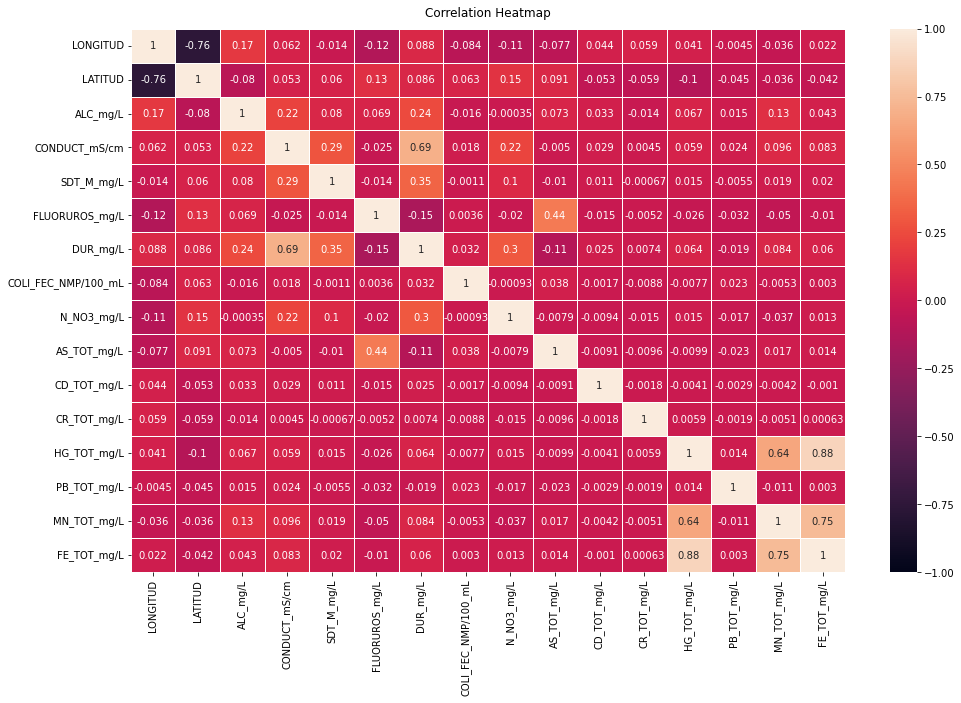

In [59]:
plt.figure(figsize=(16, 10))
heatmap=sns.heatmap(df_calidad_agua_sub[num].corr(), vmin=-1, vmax=1, annot=True,linewidths=1)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

**Obs:**

- Se observa que LONGITUD Y LATITUD están fuertemente correlacionadas de manera negativa (-0.76).
- Se observa que HG_TOT_mg/L Y MN_TOT_mg/L están medianamente correlacionadas de manera positiva (0.64).
- Se observa que DUR_mg/L Y CONDUCT_mS/cm están medianamente correlacionadas de manera positiva (0.69).
- Se observa que MN_TOT_mg/L Y FE_TOT_mg/L están altamente correlacionadas de manera positiva (0.75).
- Se observa que HG_TOT_mg/L Y FE_TOT_mg/L están fuertemente correlacionadas de manera positiva (0.88).

### e) Preparar los datos.

In [60]:
latlong=df_calidad_agua_sub[["LONGITUD","LATITUD"]].copy()

## 3. Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.

In [61]:
# Opciones numeros de clusters
no_clusters=range(1,10)

# Pruebas no. clusters
incercias=list()

# Probamos diferentes numeros de clusters
for c in no_clusters:
    modelo=KMeans(n_clusters=c)
    modelo.fit(latlong)
    
    incercias.append(modelo.inertia_)

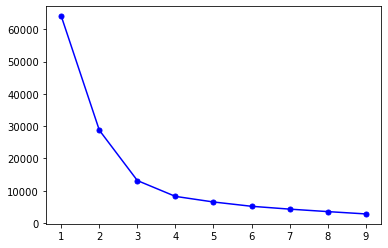

In [62]:
# Graficamos las inercias
plt.plot(no_clusters,incercias,"bo-",markersize=5)

**Obs:**

-  Observamos que el codo se forma en el 4 por lo que buscaremos 4 clústers.

In [63]:
# Entrenamos modelo
modelo=KMeans(n_clusters=4)
modelo.fit(latlong)

KMeans(n_clusters=4)

In [64]:
# Obtenemos los centros del modelo
centros=modelo.cluster_centers_

In [65]:
# adding kmeans cluster labels to the original dataframe
latlong["cluster"] = modelo.labels_

## 4. Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.

In [66]:
# Crea los punto a graficar
latlong["geometry"] = [Point(xy) for xy in zip ( latlong["LONGITUD"], latlong["LATITUD"] )]
latlong["geometry"] = latlong["geometry"].apply(Point)
latlong.head()

# Ubica datos con geopandas
gdf = gpd.GeoDataFrame(latlong, geometry="geometry")
gdf.head()

,LONGITUD,LATITUD,cluster,geometry
0,-102.02210,22.20887,3,POINT (-102.02210 22.20887)
1,-102.20075,21.99958,3,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,1,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,3,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,2,POINT (-110.24480 23.45138)


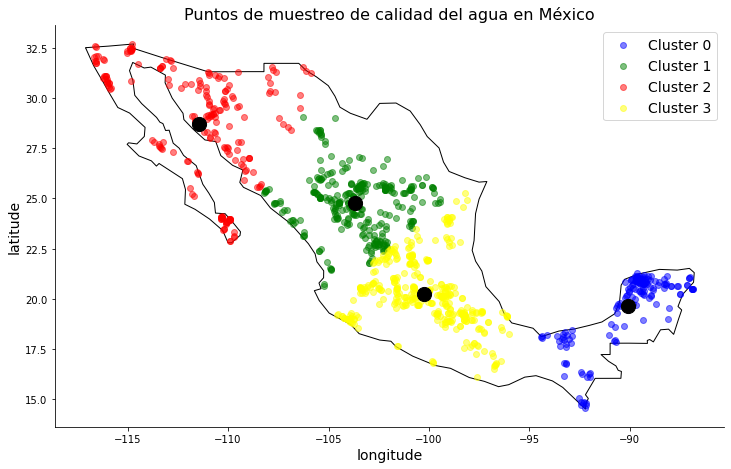

In [67]:
fig, gax = plt.subplots(figsize=(12,12))
# Seleccionar solo México
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

# Locaciones geograficas de interes
gdf[gdf["cluster"]==0].plot(ax=gax, color='blue', alpha = 0.5,legend = True)
gdf[gdf["cluster"]==1].plot(ax=gax, color='green', alpha = 0.5,legend = True)
gdf[gdf["cluster"]==2].plot(ax=gax, color='red', alpha = 0.5,legend = True)
gdf[gdf["cluster"]==3].plot(ax=gax, color='yellow', alpha = 0.5,legend = True)

# Grafica los centros
for i in range(4):
    plt.scatter(centros[i][0],centros[i][1],label=i,s=200,color="black")

gax.set_xlabel('longitude',fontsize=14)
gax.set_ylabel('latitude',fontsize=14)
gax.set_title('Puntos de muestreo de calidad del agua en México',fontsize=16)
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
gax.legend(['Cluster 0','Cluster 1','Cluster 2','Cluster 3'],fontsize=14)
plt.show()

### Análisis de relación entre ubicación y calidad del agua

In [68]:
# Identifico el cluster en datos originales
df_calidad_agua_sub["cluster"]=latlong["cluster"].copy()
df_calidad_agua_sub["geometry"]=latlong["geometry"].copy()

# Ubica datos con geopandas
gdf2 = gpd.GeoDataFrame(df_calidad_agua_sub, geometry="geometry")

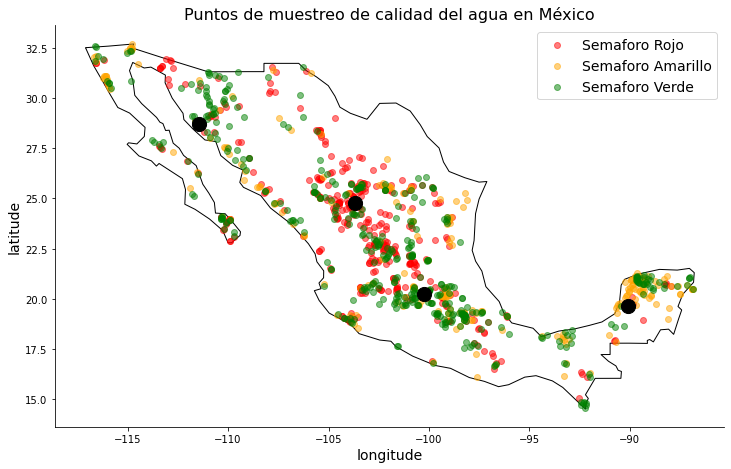

In [69]:
fig, gax = plt.subplots(figsize=(12,12))
# Seleccionar solo México
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

# Locaciones geograficas de interes
gdf2[gdf2["SEMAFORO"]==0].plot(ax=gax, color='red', alpha = 0.5,legend = True)
gdf2[gdf2["SEMAFORO"]==1].plot(ax=gax, color='orange', alpha = 0.5,legend = True)
gdf2[gdf2["SEMAFORO"]==2].plot(ax=gax, color='green', alpha = 0.5,legend = True)

# Grafica los centros
for i in range(4):
    plt.scatter(centros[i][0],centros[i][1],label=i,s=200,color="black")

gax.set_xlabel('longitude',fontsize=14)
gax.set_ylabel('latitude',fontsize=14)
gax.set_title('Puntos de muestreo de calidad del agua en México',fontsize=16)
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
gax.legend(['Semaforo Rojo','Semaforo Amarillo','Semaforo Verde'],fontsize=14)
plt.show()

In [70]:
df_calidad_agua_sub.groupby("cluster")["SEMAFORO"].value_counts()

cluster  SEMAFORO
0        1            85
         2            63
         0            14
1        0           186
         2            97
         1            39
2        2            94
         0            65
         1            47
3        2           180
         0           122
         1            76
Name: SEMAFORO, dtype: int64

Composición por cluster del Semaforo Color Rojo (valor 0)


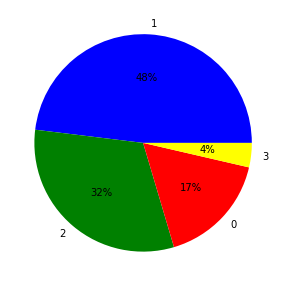

In [71]:
print("Composición por cluster del Semaforo Color Rojo (valor 0)")

# Grafica de pie cluster por SEMAFORO
plt.figure(figsize=(10,5))
plt.pie(df_calidad_agua_sub[df_calidad_agua_sub["SEMAFORO"]==0]["cluster"].value_counts(), labels=df_calidad_agua_sub[df_calidad_agua_sub["SEMAFORO"]==0]["cluster"].unique(), colors=("blue","green","red","yellow"),autopct='%.0f%%')
plt.show()

Composición por cluster del Semaforo Color Amarillo (valor 1)


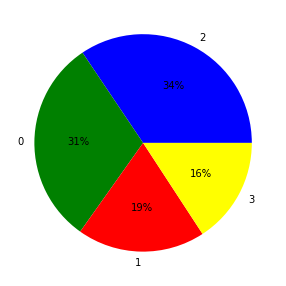

In [72]:
print("Composición por cluster del Semaforo Color Amarillo (valor 1)")

# Grafica de pie cluster por SEMAFORO
plt.figure(figsize=(10,5))
plt.pie(df_calidad_agua_sub[df_calidad_agua_sub["SEMAFORO"]==1]["cluster"].value_counts(), labels=df_calidad_agua_sub[df_calidad_agua_sub["SEMAFORO"]==1]["cluster"].unique(), colors=("blue","green","red","yellow"), autopct='%.0f%%')
plt.show()

Composición por cluster del Semaforo Color Verde (valor 2)


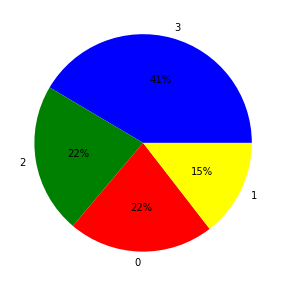

In [73]:
print("Composición por cluster del Semaforo Color Verde (valor 2)")

# Grafica de pie cluster por SEMAFORO
plt.figure(figsize=(10,5))
plt.pie(df_calidad_agua_sub[df_calidad_agua_sub["SEMAFORO"]==2]["cluster"].value_counts(), labels=df_calidad_agua_sub[df_calidad_agua_sub["SEMAFORO"]==2]["cluster"].unique(), colors=("blue","green","red","yellow"), autopct='%.0f%%')
plt.show()

Composición por Semaforo del cluster 0


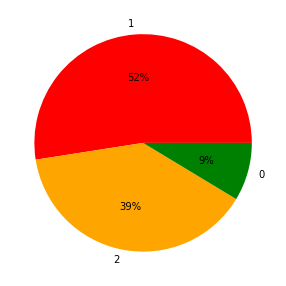

In [74]:
print("Composición por Semaforo del cluster 0")

# Grafica de pie cluster por SEMAFORO
plt.figure(figsize=(10,5))
plt.pie(df_calidad_agua_sub[df_calidad_agua_sub["cluster"]==0]["SEMAFORO"].value_counts(), labels=df_calidad_agua_sub[df_calidad_agua_sub["cluster"]==0]["SEMAFORO"].unique(),colors=("red","orange","green"), autopct='%.0f%%')
plt.show()

Composición por Semaforo del cluster 1


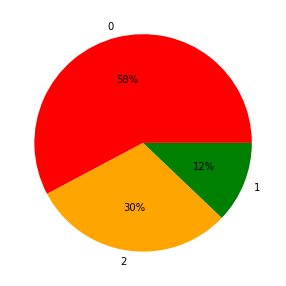

In [75]:
print("Composición por Semaforo del cluster 1")

# Grafica de pie cluster por SEMAFORO
plt.figure(figsize=(10,5))
plt.pie(df_calidad_agua_sub[df_calidad_agua_sub["cluster"]==1]["SEMAFORO"].value_counts(), labels=df_calidad_agua_sub[df_calidad_agua_sub["cluster"]==1]["SEMAFORO"].unique(),colors=("red","orange","green"), autopct='%.0f%%')
plt.show()

Composición por Semaforo del cluster 2


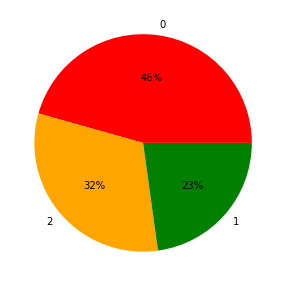

In [76]:
print("Composición por Semaforo del cluster 2")

# Grafica de pie cluster por SEMAFORO
plt.figure(figsize=(10,5))
plt.pie(df_calidad_agua_sub[df_calidad_agua_sub["cluster"]==2]["SEMAFORO"].value_counts(), labels=df_calidad_agua_sub[df_calidad_agua_sub["cluster"]==2]["SEMAFORO"].unique(),colors=("red","orange","green"), autopct='%.0f%%')
plt.show()

Composición por Semaforo del cluster 3


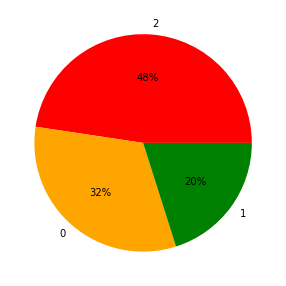

In [77]:
print("Composición por Semaforo del cluster 3")

# Grafica de pie cluster por SEMAFORO
plt.figure(figsize=(10,5))
plt.pie(df_calidad_agua_sub[df_calidad_agua_sub["cluster"]==3]["SEMAFORO"].value_counts(), labels=df_calidad_agua_sub[df_calidad_agua_sub["cluster"]==3]["SEMAFORO"].unique(),colors=("red","orange","green"), autopct='%.0f%%')
plt.show()

# Visualizando agrupaciones (clusters) y semaforo de calidad del agua
## crear dataframe por color de semáforo

In [78]:
sem_lat_long=df_calidad_agua_sub[['LATITUD','LONGITUD','SEMAFORO']].copy(deep=True)

In [79]:
col_sem=list(np.unique(sem_lat_long['SEMAFORO']))

In [80]:
sem=gpd.GeoDataFrame(sem_lat_long['SEMAFORO'],
                geometry=gpd.points_from_xy(sem_lat_long['LONGITUD'],
                                             sem_lat_long['LATITUD']))

In [81]:
poly_sem=[gpd.GeoDataFrame(sem_lat_long.loc[sem_lat_long['SEMAFORO']==ind],
                 geometry=gpd.points_from_xy(sem_lat_long.loc[sem_lat_long['SEMAFORO']==ind,'LONGITUD'],
                                             sem_lat_long.loc[sem_lat_long['SEMAFORO']==ind,'LATITUD'])) for ind in col_sem
]  


## Obteniendo datos del modelo

In [82]:
def funcenter(label,center):
    return center[label]

In [83]:
centros_clusters=funcenter(modelo.labels_,modelo.cluster_centers_)

In [84]:
centros_clusters

array([[-100.2286467 ,   20.26114492],
       [-100.2286467 ,   20.26114492],
       [-103.66584078,   24.77478631],
       ...,
       [-103.66584078,   24.77478631],
       [-103.66584078,   24.77478631],
       [-103.66584078,   24.77478631]])

In [85]:
sem_lat_long['cluster']=modelo.labels_

In [86]:
clust_latlong=sem_lat_long[['LATITUD','LONGITUD','cluster']].copy(deep=True)

In [87]:
col_clus=list(np.unique(clust_latlong['cluster']))

In [88]:
poly2=gpd.GeoDataFrame(clust_latlong,geometry=gpd.points_from_xy(clust_latlong['LONGITUD'],clust_latlong['LATITUD'])).dissolve('cluster').convex_hull

In [89]:
poly2.index

Int64Index([0, 1, 2, 3], dtype='int64', name='cluster')

In [90]:
poly2

cluster
0    POLYGON ((-92.21712 14.56115, -92.41133 14.732...
1    POLYGON ((-105.21211 20.64282, -108.19576 25.2...
2    POLYGON ((-109.90731 22.89050, -111.72009 25.1...
3    POLYGON ((-97.59158 16.11369, -99.80990 16.785...
dtype: geometry

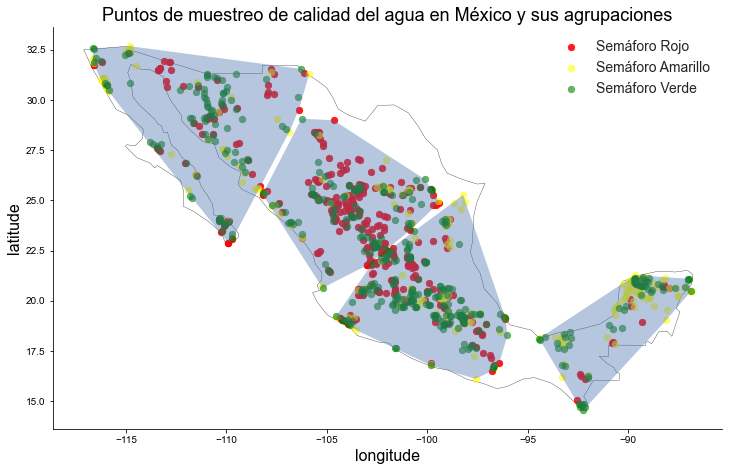

In [91]:
fig, gax1 = plt.subplots(figsize=(12,14))
plt.style.use('seaborn')
# Seleccionar solo México
world.query("name == 'Mexico'").plot(ax = gax1, edgecolor='black', color='white')

poly_sem[0].plot(ax=gax1,color='red',legend=True,alpha=.9)
poly_sem[1].plot(ax=gax1,color='yellow',legend=True,alpha=.6)
poly_sem[2].plot(ax=gax1,color='green',legend=True,alpha=.6)
poly2.plot(ax=gax1,alpha=.4)

gax1.set_xlabel('longitude',fontsize=16)
gax1.set_ylabel('latitude',fontsize=16)
gax1.set_title('Puntos de muestreo de calidad del agua en México y sus agrupaciones',fontsize=18)
gax1.spines['top'].set_visible(False)
gax1.spines['right'].set_visible(False)
gax1.legend(['Semáforo Rojo','Semáforo Amarillo','Semáforo Verde'],fontsize=14)
gax1.grid(False)
plt.show()

In [92]:
sem_lat_long.groupby(['SEMAFORO'])['cluster'].value_counts()

SEMAFORO  cluster
0         1          186
          3          122
          2           65
          0           14
1         0           85
          3           76
          2           47
          1           39
2         3          180
          1           97
          2           94
          0           63
Name: cluster, dtype: int64

**Obs

En general determinar correlación entre la calidad del agua subterránea en función de una agrupación geográfica arbitraria (la generada por k-means) parece ser un ejercicio complicado. En este grupo solo se puede observar que el cluster de la península de Yucatán y el clúster del Noroeste (Sonora) son los que tienen menos cantidad de pozos con el semáforo en rojo (suman 79 de 387 que representan aproximadamente un 20% del total de los que se encuentran en rojo).

Los pozos con semáforo en color amarillo parecen estar distribuidos de una manera similar a lo largo de todo el país.